In [3]:
import pandas as pd
from collections import defaultdict

from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence

In [4]:
def remove_symbols(text):
    new_text = ''
    text_sentences = text.split('\n')
    for sentence in text_sentences:
        sentence_phrases = re.findall(r'[\w\s]+', sentence)
        new_text += ' '.join(sentence_phrases) + '\n'
    return new_text

In [5]:
def time_counter(func):

    def wrapper(*args, **kwargs):
        start_time = datetime.datetime.now()
        start_formated_time = start_time.strftime("%Y-%M-%d %H:%M:%S")
        print("[START] - {} {}".format(func.__name__, start_formated_time))
        ret = func(*args, **kwargs)
        end_time = datetime.datetime.now()
        end_formated_time = end_time.strftime("%Y-%M-%d %H:%M:%S")
        print("[COMPLETED] - {} {}".format(func.__name__, end_formated_time))
        timedelta = end_time - start_time
        print("[TIME CONSUMED] - {} {} hours".format(func.__name__, timedelta.seconds / 3600))
        return ret

    return wrapper

In [ ]:
wiki_df = pd.read_csv('../test_data/wiki_test_tokenized.csv')
news_df = pd.read_csv('../test_data/news_test_tokenized.csv')

total_cont_path = '../test_data/total_test_contents.txt'
total_cont_without_symbols_path = '../test_data/total_test_contents_removed_symbols.txt'

we_file_path = '../test_data/word_embedding_test.txt'

word_appearance_vocab_path = '../test_data/appear_vocab.txt'

In [ ]:
def merge_all_contents():
    total_content_list = [str(content) for content in wiki_df['content']] + [str(content) for content in news_df['content']]
    total_contents = '\n'.join(total_content_list)

    total_contents_removed_symbols = remove_symbols(total_contents)

    with open(total_cont_path, 'w') as hf:
        hf.write(total_contents)

    with open(total_cont_without_symbols_path, 'w') as hf:
        hf.write(total_contents_removed_symbols)

    return total_contents, total_contents_removed_symbols

In [ ]:
@time_counter
def train_wordvec(txt_path, we_filename):
    path = get_tmpfile(we_filename)

    sentences = LineSentence(txt_path)
    model = Word2Vec(sentences, size=300, window=5, min_count=1, workers=12)
    model.wv.save_word2vec_format(we_filename)
    print(model.wv.most_similar("数学"))

*train_wordvec*得到的we_filename类似下面结构，一个词对应一个300维向量：
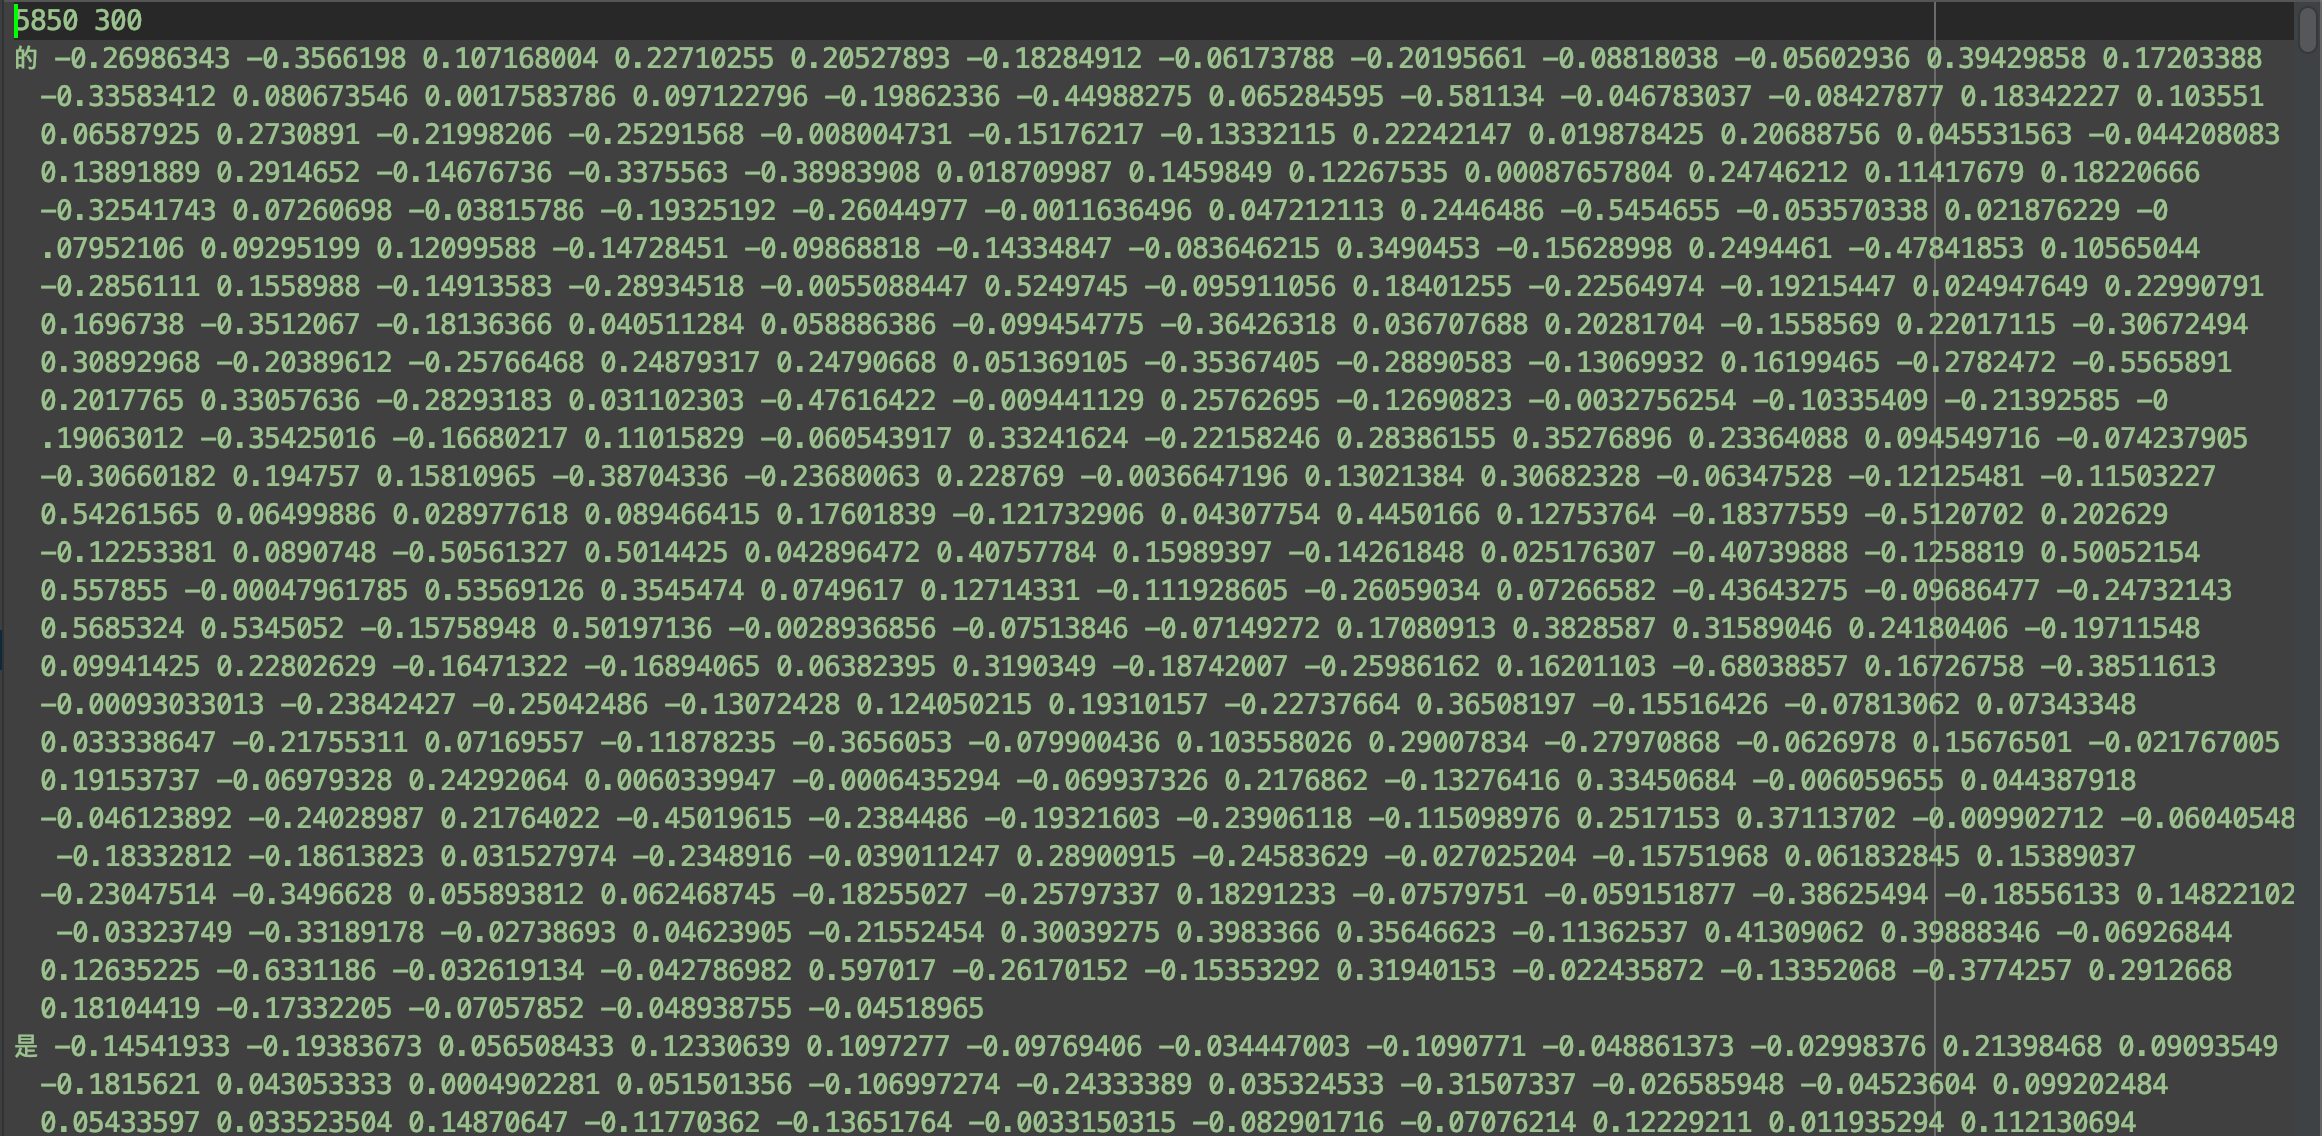

In [ ]:
@time_counter
def word_appearance_vocab(rm_symbol=True):
    appearance_dic = defaultdict(int)
    if rm_symbol:
        contents = totalcontents_removed_symbols
    else:
        contents = total_contents

    words = contents.split()

    for word in words:
        appearance_dic[word] += 1

    with open(word_appearance_vocab_path, 'w') as wh:
        for word in appearance_dic:
            wh.write('{} {}\n'.format(word, appearance_dic[word]))

*word_appearance_vocab*用来生成词频参考文件
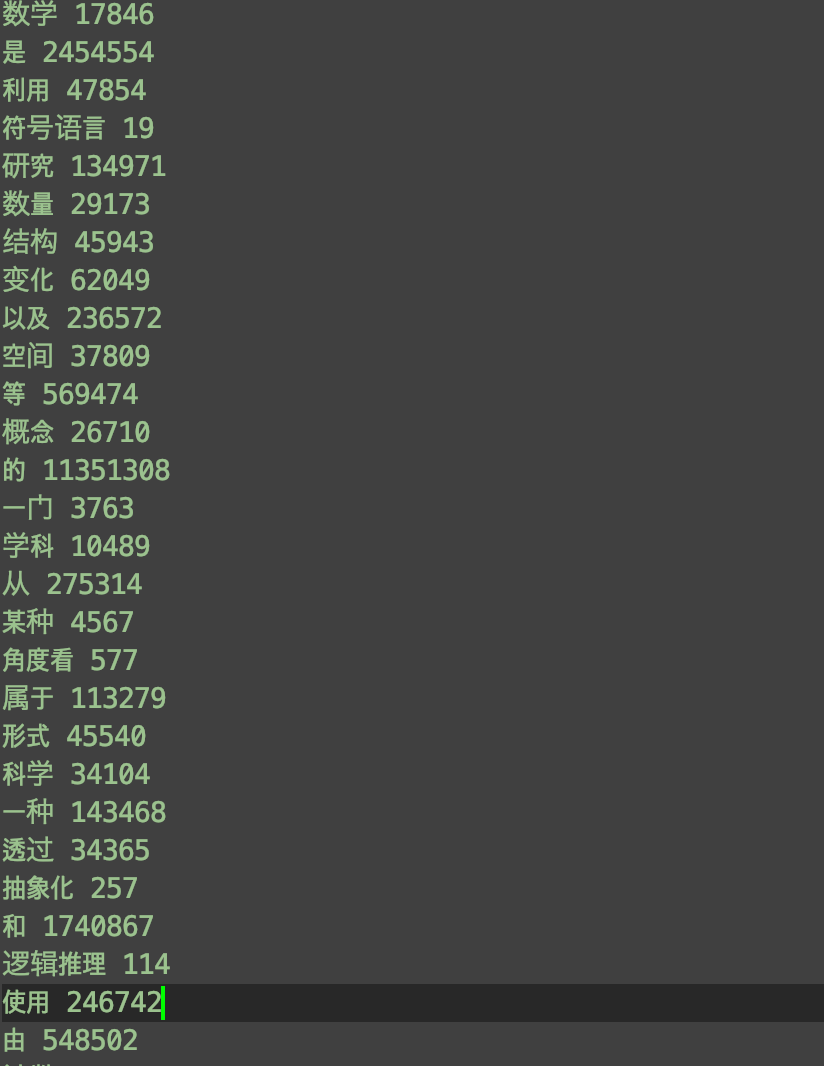

In [ ]:
total_contents, totalcontents_removed_symbols = merge_all_contents()
word_appearance_vocab()
train_wordvec(total_cont_without_symbols_path, we_file_path)